In [180]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [182]:
S = [1000]
I = [10]
R = [0]
t = [0]

tend = 500

beta = 0.05
gamma = 0.01

In [184]:
while t[-1] < tend and (I[-1] >= 1):

    N = S[-1] + I[-1] + R[-1]

    propensities = [beta*I[-1]*S[-1]/N, gamma*I[-1]]

    prop_sum = sum(propensities)

    dt = np.random.exponential(scale=1/prop_sum)

    t.append(t[-1]+dt)

    rand = random.uniform(0,1)
        
    if rand * prop_sum <= propensities[0]:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1]) 
    else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)    


t_stoch = t.copy()

min_len = min(len(t_stoch), len(S), len(I), len(R))

t_stoch = t_stoch[:min_len]

S = S[:min_len]
I = I[:min_len]
R = R[:min_len]

def deterministic(variables, t, params):
    S, I, R = variables
    
    N = S + I + R
    
    beta, gamma = params
    
    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt]

t_det = np.linspace(0, tend, num=1000)

parameters = [beta, gamma]

y0 = [S[0], I[0], R[0]]

y = odeint(deterministic, y0, t_det, args=(parameters,))

S_det, I_det, R_det = y[:, 0], y[:, 1], y[:, 2]

S_interp = interp1d(t_stoch, S, kind='linear', fill_value="extrapolate")(t_det)
I_interp = interp1d(t_stoch, I, kind='linear', fill_value="extrapolate")(t_det)
R_interp = interp1d(t_stoch, R, kind='linear', fill_value="extrapolate")(t_det)

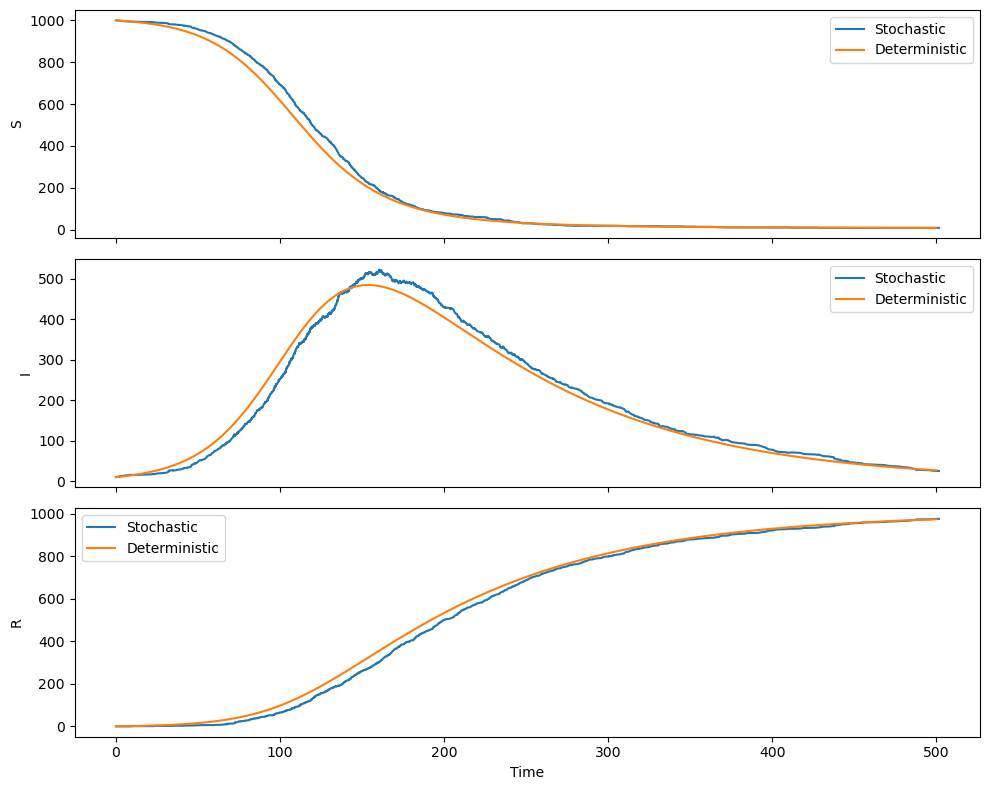

In [194]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(10, 8))

ax1.plot(t_stoch, S, label="Stochastic")
ax1.plot(t_det, S_det, label="Deterministic")
ax1.set_ylabel("S")
ax1.legend()

ax2.plot(t_stoch, I, label="Stochastic")
ax2.plot(t_det, I_det, label="Deterministic")
ax2.set_ylabel("I")
ax2.legend()

ax3.plot(t_stoch, R, label="Stochastic")
ax3.plot(t_det, R_det, label="Deterministic")
ax3.set_ylabel("R")
ax3.set_xlabel("Time")
ax3.legend()

plt.tight_layout()
plt.show()

In [196]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b) ** 2))

nrmse_S = rmse(S_det, S_interp) / np.mean(S_det)
nrmse_I = rmse(I_det, I_interp) / np.mean(I_det)
nrmse_R = rmse(R_det, R_interp) / np.mean(R_det)

print(f"NRMSE for S: {nrmse_S:.4f}")
print(f"NRMSE for I: {nrmse_I:.4f}")
print(f"NRMSE for R: {nrmse_R:.4f}")

NRMSE for S: 0.1153
NRMSE for I: 0.1044
NRMSE for R: 0.0405
